In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scienceplots

plt.style.use(['science','nature','no-latex','vibrant'])

plt.rcParams.update({
    "font.family": "Arial",   # specify font family here
    "font.serif": ["sans-serif"],  # specify font here
    "font.size":11})          # specify font size here

from scipy import constants

#Import personal functions
import sys
#sys.path.append("C:/Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Functions")
#sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
sys.path.append("C:/Users/Olivi/Documents/Git/SoRoMa/Thermal_Soft_Robotics_data/Functions")

import FluidicSetupFunctions
from save_plot_func import save_plot

In [2]:
#Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Pouch\Data\T_oscilations"
Location = r"C:\Users\Olivi\Documents\Git\SoRoMa\Thermal_soft_robotics_data\Thermal_actuation\Experimental\Fluidic\Pouch\Data\T_oscilations"

Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 1


In [3]:
data[1]

{'Samplerate': [1000],
 'Samplename': ['1740mg_T_osilations'],
 'Offset': [{'DigOut-1': 4.899206888888889, 'SSCDP30-2': 2.4954443333333334}]}

C:\Users\Olivi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


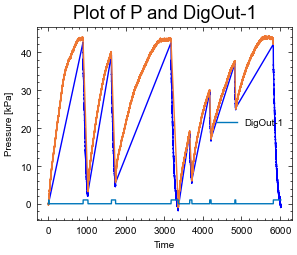

In [4]:
P = data[0][0]['SSCDP30-2']/1000
t = data[0][0]['Time']
dig = data[0][0]['DigOut-1']


# Find the indices where dig == 1
indices = dig == 1

# Plot the segments where dig == 1 in blue, and others in the default color
plt.plot(t[indices], P[indices], color='blue')  # Blue where dig == 1
plt.plot(t[~indices], P[~indices])  # Default color where dig != 1

# If you also want to plot the 'dig' signal:
plt.plot(t, dig, label='DigOut-1')

plt.xlabel('Time')
plt.ylabel('Pressure [kPa]')
plt.title('Plot of P and DigOut-1')
plt.legend()
plt.show()

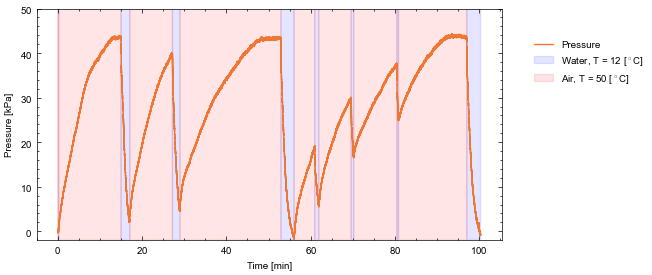

In [7]:
# Assuming data[0][0] is a pandas DataFrame
P = data[0][0]['SSCDP30-2'] / 1000
t = data[0][0]['Time']/60
dig = data[0][0]['DigOut-1']

# Plot your primary data
plt.figure(figsize=(6, 3) )
plt.ylim(np.min(P),50)
plt.plot(t, P, label = 'Pressure')


# Highlight background where dig > 0.9
plt.fill_between(t, plt.ylim()[0], plt.ylim()[1], where=(dig > 0.9), color='blue', alpha=0.1, label='Water, T = 12 [$^\circ$C]')

# Optional: Highlight background where dig < 0.9 with a different color
plt.fill_between(t, plt.ylim()[0], plt.ylim()[1], where=(dig < 0.9), color='red', alpha=0.1, label='Air, T = 50 [$^\circ$C]')

plt.xlabel('Time [min]')
plt.ylabel('Pressure [kPa]')
#plt.title('Plot of P with Background Highlight')
plt.legend(bbox_to_anchor=(1.05, 0.9))
#plt.title('Temperature dependent pressure oscillations')
plt.savefig('figures/Temperature_dependent_pressure_oscillations.png', bbox_inches='tight', dpi=300)
plt.show()